In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [481]:
data=pd.read_csv(r"C:\programming languages\ML with python\NHAIAccidentData-1_-1204467829.csv")

In [482]:
data.head()

,Date,TimeOfAcc,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015,9:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014,7:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014,8:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015,5:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015,8:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date                           91 non-null     object
 1   TimeOfAcc                      91 non-null     object
 2   AccLocation                    89 non-null     object
 3   NatureAccident                 91 non-null     int64 
 4   ClassificationOfAccident       91 non-null     object
 5   Causes                         91 non-null     object
 6   RoadFeature                    91 non-null     int64 
 7   RoadCondition                  91 non-null     int64 
 8   IntersectionTypeControl        91 non-null     int64 
 9   WeatherCondition               91 non-null     int64 
 10  VehicleResponsible             91 non-null     object
 11  Fatal                          91 non-null     int64 
 12  Grevious                       91 non-null     int64 
 13  Minor  

In [484]:
#change AccLoc like '722+1' to '722.1'

data['AccLocation']=data['AccLocation'].str.replace('+','.')

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_20220\154413176.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['AccLocation']=data['AccLocation'].str.replace('+','.')


<AxesSubplot:xlabel='AccLocation'>

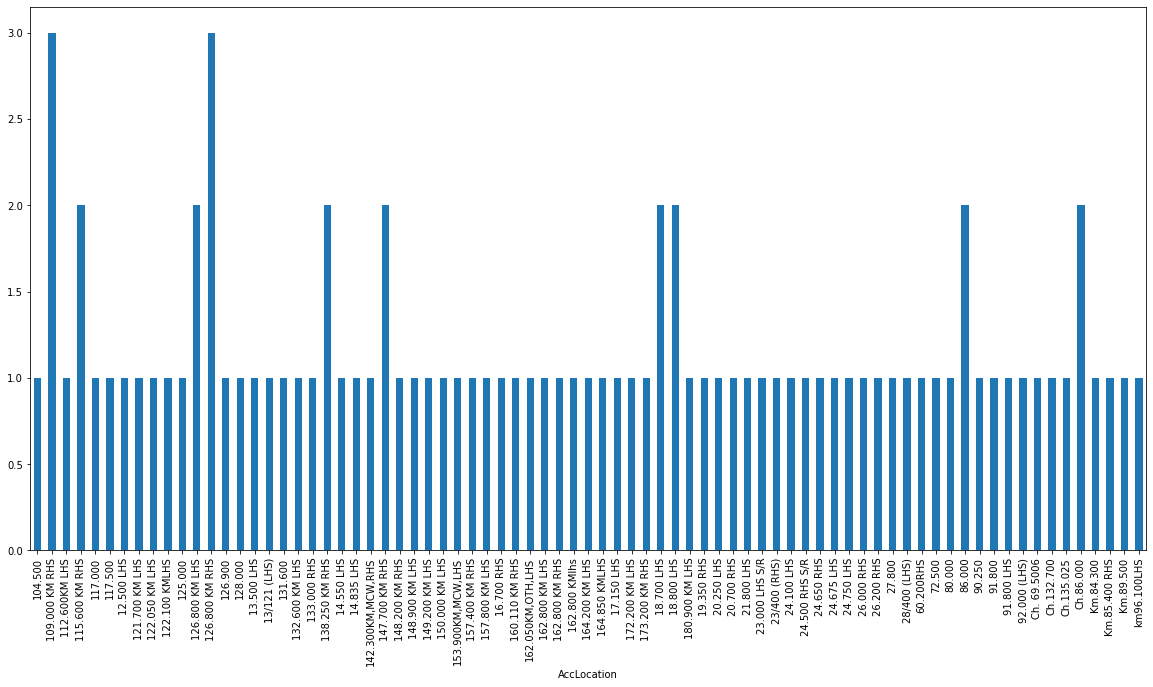

In [485]:
#analyse the AccLocation graphicallly groupby AccLocation and count the number of accidents

data.groupby('AccLocation')['AccLocation'].count().plot(kind='bar',figsize=(20,10))

In [486]:
#analyse the AccLocation groupby AccLocation and count the number of accidents

data.groupby('AccLocation')['AccLocation'].count().sort_values(ascending=False).head(10)

AccLocation
109.000 KM RHS    3
126.800 KM RHS    3
138.250 KM RHS    2
126.800 KM LHS    2
18.800 LHS        2
147.700 KM RHS    2
86.000            2
18.700 LHS        2
115.600 KM RHS    2
Ch.86.000         2
Name: AccLocation, dtype: int64

In [487]:
data.loc [data['VehicleResponsible'].str.contains('lorry',case=False), 'Encoded_VehicleResponsible']='0'
data.loc [data['VehicleResponsible'].str.contains('truck',case=False), 'Encoded_VehicleResponsible']='0'
data.loc [data['VehicleResponsible'].str.contains('car',case=False), 'Encoded_VehicleResponsible']='1'
data.loc [data['VehicleResponsible'].str.contains('bus',case=False), 'Encoded_VehicleResponsible']='0'
data.loc [data['VehicleResponsible'].str.contains('motor cycle',case=False), 'Encoded_VehicleResponsible']='2'
data.loc [data['VehicleResponsible'].str.contains('two wheeler',case=False), 'Encoded_VehicleResponsible']='2'
data.loc [data['VehicleResponsible'].str.contains('bike',case=False), 'Encoded_VehicleResponsible']='2'
data.loc [data['VehicleResponsible'].str.contains('unknown',case=False), 'Encoded_VehicleResponsible']='3'
data.loc [data['VehicleResponsible'].str.contains('lcv',case=False), 'Encoded_VehicleResponsible']='1'
data.loc [data['VehicleResponsible'].str.contains('tipper',case=False), 'Encoded_VehicleResponsible']='1'
data.loc [data['VehicleResponsible'].str.contains('matador',case=False), 'Encoded_VehicleResponsible']='1'
data.loc [data['VehicleResponsible'] =='', 'Encoded_VehicleResponsible']='4'

encodedVehiclesResponsible=pd.get_dummies(data['Encoded_VehicleResponsible'],prefix='VehicleResponsible',drop_first=True)
data['VehicleResponsible_1']=encodedVehiclesResponsible['VehicleResponsible_1']
data['VehicleResponsible_2']=encodedVehiclesResponsible['VehicleResponsible_2']
data['VehicleResponsible_3']=encodedVehiclesResponsible['VehicleResponsible_3']

data=data.drop(['VehicleResponsible'],axis=1)
data=data.drop(['Encoded_VehicleResponsible'],axis=1)

In [488]:
encoded_HelpProvidedBy = pd.get_dummies(data['HelpProvidedByAmbulancePatrol'],prefix='HelpProvidedBy',drop_first=True)

data['HelpProvidedBy_Ambulance/Petrol Vehicle']=encoded_HelpProvidedBy['HelpProvidedBy_Ambulance/Petrol Vehicle']
data['HelpProvidedBy_Petrol Vehicle']=encoded_HelpProvidedBy['HelpProvidedBy_Petrol Vehicle']

data=data.drop(['HelpProvidedByAmbulancePatrol'],axis=1)

In [489]:
accidentDate=pd.to_datetime(data['Date'])
data['AccYear']=accidentDate.dt.year
data['AccMonth']=accidentDate.dt.month
data['AccDay']=accidentDate.dt.day

data=data.drop(['Date'],axis=1)

c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\shivansh uppal\AppData\Local\Progr

In [490]:
newAccidentTimeCols = data["TimeOfAcc"].str.split(" ", n = 1, expand = True)
data['TimeOfAccNumeric']=newAccidentTimeCols[0]
data['TimeOfAccAMPM']=newAccidentTimeCols[1]
data=data.drop(['TimeOfAcc'],axis=1)

accidentHourMinute = data['TimeOfAccNumeric'].str.split(":", n=1, expand=True)
data['HourOfAccident'] = accidentHourMinute[0]

data=data.drop(['TimeOfAccNumeric'],axis=1)

time= pd.get_dummies(data['TimeOfAccAMPM'],drop_first=True)
data=pd.concat([data,time],axis=1)

data=data.drop(['TimeOfAccAMPM'],axis=1)

In [491]:
data =data.drop (data[data.ClassificationOfAccident=='-'].index)

In [492]:
data.head(1)

,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,Fatal,Grevious,...,VehicleResponsible_1,VehicleResponsible_2,VehicleResponsible_3,HelpProvidedBy_Ambulance/Petrol Vehicle,HelpProvidedBy_Petrol Vehicle,AccYear,AccMonth,AccDay,HourOfAccident,PM
0,Ch. 69.5006,2,2,2,2,1,9,1,0,2,...,0,0,0,0,1,2015,9,6,9,0


In [493]:
data=data.drop(['AccLocation','Remarks'],axis=1)

In [494]:
data = data[~data['Causes'].str.contains('-')]

In [495]:
data.columns

Index(['NatureAccident', 'ClassificationOfAccident', 'Causes', 'RoadFeature',
       'RoadCondition', 'IntersectionTypeControl', 'WeatherCondition', 'Fatal',
       'Grevious', 'Minor', 'Injured', 'NumAnimalsKilled',
       'VehicleResponsible_1', 'VehicleResponsible_2', 'VehicleResponsible_3',
       'HelpProvidedBy_Ambulance/Petrol Vehicle',
       'HelpProvidedBy_Petrol Vehicle', 'AccYear', 'AccMonth', 'AccDay',
       'HourOfAccident', 'PM'],
      dtype='object')

In [496]:
data.drop(['NumAnimalsKilled','Injured','WeatherCondition',
           'HelpProvidedBy_Ambulance/Petrol Vehicle','HelpProvidedBy_Petrol Vehicle',
           'IntersectionTypeControl','PM'],
          axis=1,inplace=True)

In [497]:
data.ClassificationOfAccident.unique()

array(['2', '1', '3', '4'], dtype=object)

In [498]:
data.shape

(81, 15)

MODEL CREATION

In [499]:
data2015 = data.loc [data.AccYear==2015, data.columns[:]] # type: ignore
data2014 = data.loc [data.AccYear==2014, data.columns[:]] # type: ignore

In [500]:
data2014.drop(['AccYear'],axis=1,inplace=True)
data2015.drop(['AccYear'],axis=1,inplace=True)

In [501]:
data2014.shape, data2015.shape

((31, 14), (46, 14))

In [502]:
train_y=data2014['ClassificationOfAccident']
train_X=data2014.drop(['ClassificationOfAccident'],axis=1)

test_y=data2015['ClassificationOfAccident']
test_x=data2015.drop(['ClassificationOfAccident'],axis=1)

In [503]:
#random forest

from sklearn.ensemble import RandomForestClassifier

#classificaiton metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [504]:
rf = RandomForestClassifier(n_estimators=10000,
        max_depth=10,
        max_features='auto',
        bootstrap=True,
        oob_score=True,
        criterion='entropy')

rf.fit(train_X, train_y)

predicted_y_with_test_data = rf.predict(test_x)

In [505]:
print("Accuracy with test data: ", accuracy_score(test_y, predicted_y_with_test_data))

print("Confusion Matrix with test data: \n", confusion_matrix(test_y, predicted_y_with_test_data))

print("Classification Report with test data: \n", classification_report(test_y, predicted_y_with_test_data))

Accuracy with test data:  0.6739130434782609
Confusion Matrix with test data: 
 [[ 7  0  1  0]
 [ 2  9  6  0]
 [ 0  0 13  0]
 [ 0  2  4  2]]
Classification Report with test data: 
               precision    recall  f1-score   support

           1       0.78      0.88      0.82         8
           2       0.82      0.53      0.64        17
           3       0.54      1.00      0.70        13
           4       1.00      0.25      0.40         8

    accuracy                           0.67        46
   macro avg       0.78      0.66      0.64        46
weighted avg       0.76      0.67      0.65        46



In [507]:
#identify important features

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = train_X.columns


#dataframe of important features

feature_importance = pd.DataFrame({'feature':features,'importance':importances})
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
feature_importance.head(5)

,feature,importance
4,Fatal,0.211004
5,Grevious,0.125484
6,Minor,0.120896
0,NatureAccident,0.085029
1,Causes,0.082723
